In [1]:
# 모듈 임포트

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 다항 회귀(Polynomial Regression)

- Polynomial Regression과 과대적합/과소적합의 이해

## 다항 회귀(Polynomial Regression) 이해

**다중선형회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현

**다항회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
- 선형회귀임

$ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

$ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**
- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환

PolynomialFeatures(degree=차수)

fit_transform(피처)

In [2]:
# sklearn.preprocessing은 인코더 스케일러등 데이터 변환을 하는 전처리에 사용할 수 있는 애들이 있다
# sklearn.preprocessing모듈에는 스케일링, 센터링, 정규화, 이진화 방법 이 포함됩니다
# preprocessing.PolynomialFeatures : 다항식 및 상호 작용 기능을 생성합니다.

from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2)
print(X)

# to (1, x1, x2, x1^2, x1*x2, x2^2)

# degree : 차수
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [3]:
X = np.arange(6).reshape(3,2)
print(X)

# transform (x1, x2)
# to (1, x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3)
# 1, x₁, x₂, x₁², x₁*x₂, x₂², x₁³, x₁²*x₂, x₁*x₂², x₂³

poly3 = PolynomialFeatures(degree=3)
poly3.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

**3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성**

즉 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$ 

**3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습**

In [4]:
from sklearn.linear_model import LinearRegression

# 다항식 생성 함수

def poly_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# X = np.arange(0, 4).reshape(2,2)
X = np.array([[2,3], [4,2], [9,1]])
print('X',X)

y = poly_func(X)
print('y', y)

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 : ', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)

# coef_ : 최적의 회귀계수
print('다항 회귀계수 :', np.round(model.coef_, 2))


X [[2 3]
 [4 2]
 [9 1]]
y [125  89 266]
3차 다항식 계수 :  [[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   2.  16.   8.   4.  64.  32.  16.   8.]
 [  1.   9.   1.  81.   9.   1. 729.  81.   9.   1.]]
다항 회귀계수 : [-0.   -0.12  0.07 -0.47 -0.15  0.37  0.42 -1.2   0.11  1.43]


### 파이프라인(Pipeline)을 이용한 3차 다항회귀 학습  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

**`sklearn.pipeline의 Pipeline 클래스`**

- 연속된 변환을 순서대로 처리할 수 있도록 도와주는 클래스

- 형식 : 연속된 단계를 나타내는 (name, transforms) 튜플 목록을 입력받음
    - 마지막 단계에서는 transforms와 estimator를 모두 사용할 수 있고, 그외는 transforms여야 함
    - transforms는 fit_transform() 메서드를 가지고 있어야 함
    - estrimator는 fit(), predict() 메서드를 가지고 있어야 함
    
- 파이프라인의 fit() 메서드 호출:
    - 모든 transforms의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달
    - 마지막 단계에서는 fit()메서드만 호출

- 파이프라인 객체는 마지막 estimator와 동일한 메서드를 제공

In [5]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])

In [6]:
pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [7]:
pipe.named_steps['linear'].coef_

array([-1.47104551e-15, -1.19750453e-01,  7.06541611e-02, -4.66994248e-01,
       -1.48494279e-01,  3.67642718e-01,  4.19614380e-01, -1.20469049e+00,
        1.05378541e-01,  1.42866054e+00])

### 가상 데이터 생성 및 다항 회귀 추정

**가상 데이터 생성**

In [8]:
# 2차 다항식 : 0.5*x^2 + 2*x

n = 100
X = np.random.rand(n, 1)*6 - 3
y = 0.5*X**2 + 2*X + 2 + np.random.randn(n, 1)

In [9]:
X.shape, y.shape

((100, 1), (100, 1))

**scatterplot**

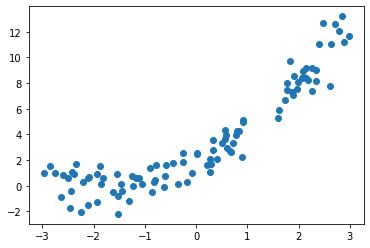

In [10]:
plt.scatter(X, y)

- 비선형적으로 분포
- 사이킷런의 PolynomialFeatures를 사용

**파이프라인**

In [11]:
pipe2 = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                  ('linear', LinearRegression())])

In [12]:
pipe2.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [13]:
np.round(pipe2.named_steps['linear'].coef_, 2)

array([[2.01, 0.55]])

In [14]:
np.round(pipe2.named_steps['linear'].intercept_, 2)

array([1.8])

**선형회귀 LinearRegression 적용하여 회귀계수 추정**

**다항회귀식 시각화**

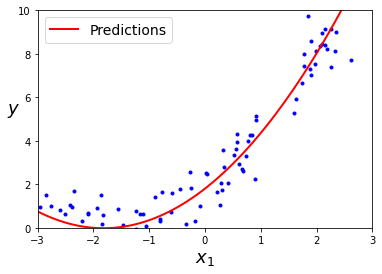

In [15]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feat.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

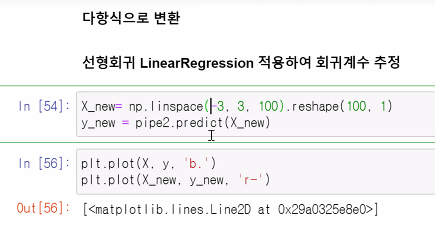

### 다항회귀를 이용한 보스톤 집값 예측

In [16]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

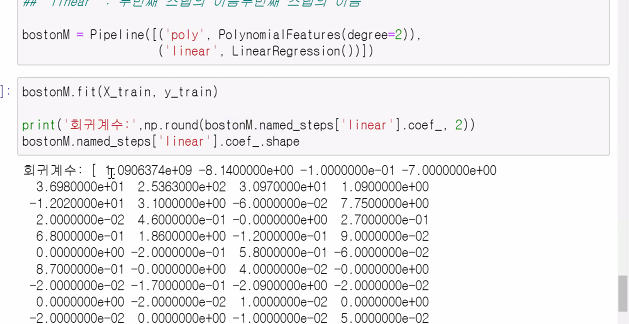
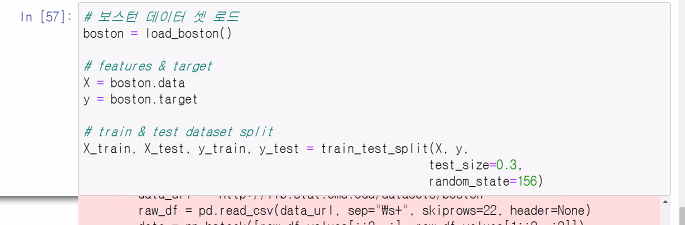

In [17]:
# 보스턴 데이터 셋 로드
boston = load_boston()

# features & target 
X = boston.data
y = boston.target

# train & test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [20]:
## pipeline을 이용하여 PolynomialFeatures 변환과
# LinearRegression 적용을 순차적으로 결합
## 'poly' : 첫번째 스탭의 이름 (변수명처럼 직접 만들어 지어줌)
## 'linear' : 두번째 스탭의 이름

bostonM = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('linear', LinearRegression())])

In [21]:
bostonM.fit(X_train, y_train)

print('회귀계수 :', np.round(bostonM.named_steps['linear'].coef_, 2))
bostonM.named_steps['linear'].coef_.shape

회귀계수 : [-1.09063739e+09 -8.13000000e+00 -9.00000000e-02 -7.01000000e+00
  3.69700000e+01  2.53630000e+02  3.09600000e+01  1.25000000e+00
 -1.20200000e+01  3.09000000e+00 -1.30000000e-01  7.76000000e+00
  5.00000000e-02  5.10000000e-01 -0.00000000e+00  2.70000000e-01
  6.00000000e-01  1.86000000e+00 -1.40000000e-01 -0.00000000e+00
  1.00000000e-02 -1.00000000e-01  5.90000000e-01 -6.00000000e-02
  9.60000000e-01 -0.00000000e+00  4.00000000e-02 -0.00000000e+00
 -3.00000000e-02 -2.10000000e-01 -2.11000000e+00 -7.00000000e-02
  0.00000000e+00 -3.00000000e-02  1.00000000e-02  0.00000000e+00
 -2.00000000e-02  1.00000000e-02 -1.00000000e-02  4.00000000e-02
 -5.30000000e-01 -7.00000000e-02  1.90000000e-01  1.00000000e-02
  1.80000000e-01 -4.00000000e-02  0.00000000e+00 -7.00000000e-02
  1.00000000e-02 -2.00000000e-02  3.69700000e+01 -2.92400000e+01
 -5.98000000e+00 -3.00000000e-02  1.74000000e+00  3.00000000e-02
  3.00000000e-02 -1.99000000e+00  3.00000000e-02 -1.70000000e-01
 -7.70100000e+01 -

(105,)

In [23]:
pred = bostonM.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
rmse = np.sqrt(mse)

print('2차 다항 회귀 결과')
print('MSE: {0:.2f}, RMSE: {1:.2f}, R2: {2:.2f}'.format(mse, rmse, r2))


3차 다항 회귀 결과
MSE: 41.73, RMSE: 6.46, R2: 0.41


In [25]:
bostonM = Pipeline([('poly', PolynomialFeatures(degree=3)),
                    ('linear', LinearRegression())])

bostonM.fit(X_train, y_train)

pred = bostonM.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
rmse = np.sqrt(mse)

print('1차 다항 회귀 결과')
print('MSE: {0:.2f}, RMSE: {1:.2f}, R2: {2:.2f}'.format(mse, rmse, r2))

1차 다항 회귀 결과
MSE: 79625.59, RMSE: 282.18, R2: -1116.60
